In [ ]:
"In this exercise, we aim to fit a linear regression model to predict units sold (sales) using TV " \
"advertising budget (tv) as the predictor. However, when fitting a linear regression, small " \
"variations in the training data can significantly influence the coefficients of the model."

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse

In [13]:
df = pd.read_csv('Advertising_adj.csv')
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [14]:
# Create two empty lists that will store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate 
# that many new versions of the dataset
parallelUniverses = 1000

# Loop over the maximum number of parallel Universes
for i in range(parallelUniverses):

    # Call the RandomUniverse helper function with the dataframe
    # read from the data file
    df_new = RandomUniverse(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.mean()['tv']

    # Find the mean of the response values i.e. sales
    ymean = df_new.mean()['sales']

    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = sum((df_new['tv']-xmean)*(df_new['sales']-ymean))/sum((df_new['tv']-xmean)**2)
    beta0 = ymean - beta1*xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [15]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

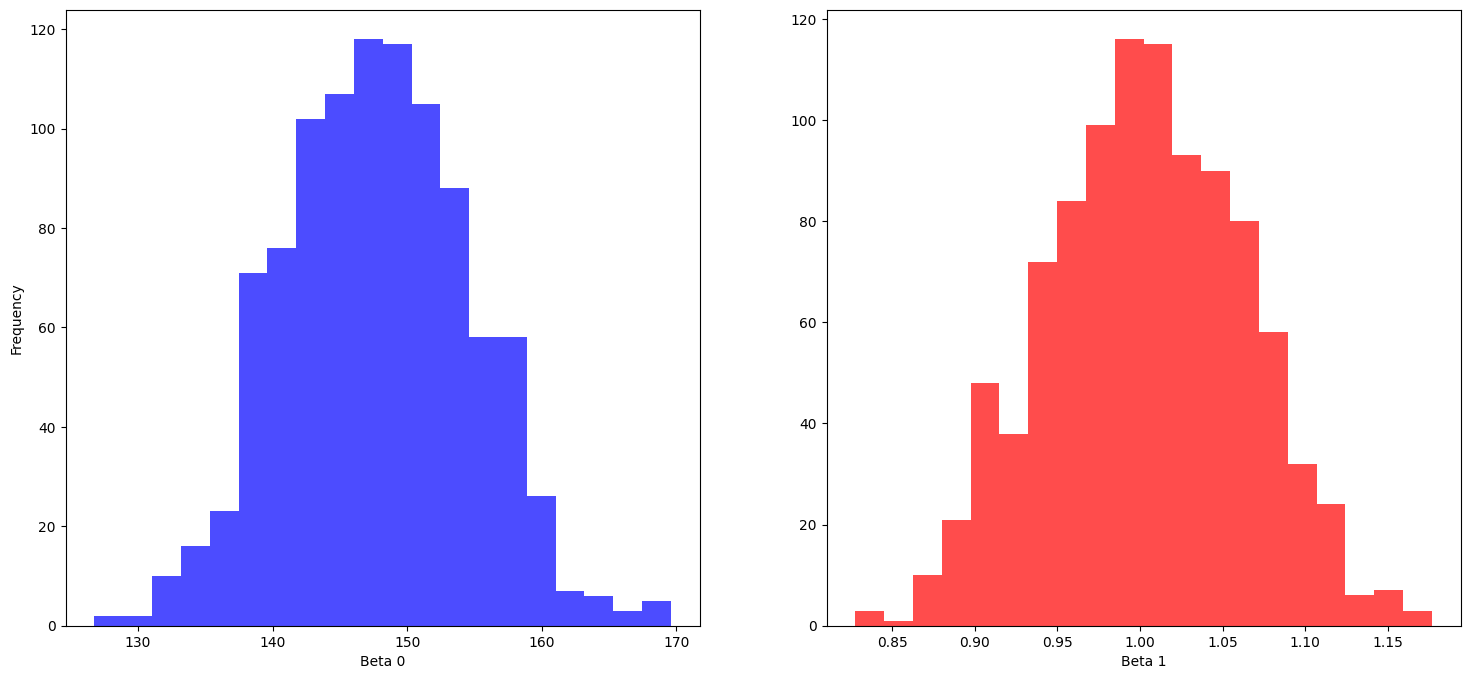

In [16]:
# Plot histograms of beta_0 and beta_1 using lists created above 
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list, bins=20, color='blue', alpha=0.7)
ax[1].hist(beta1_list, bins=20, color='red', alpha=0.7)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');